In [2]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split

# create a 2 class classification dataset

In [4]:
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


# print the sizes of the training and testing sets

In [5]:
print("size of xtrain and ytrain: ",len(X_train),len(y_train))
print("size of xtest and ytest : ",len(X_test),len(y_test))


size of xtrain and ytrain:  7500 7500
size of xtest and ytest :  2500 2500


# plot the dataset to see the distribution of the 2 classes.

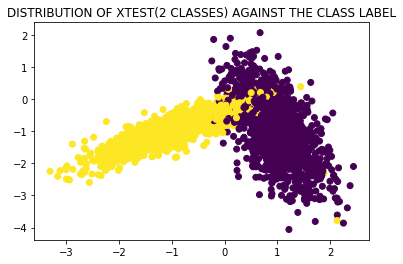

In [6]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.title("DISTRIBUTION OF XTEST(2 CLASSES) AGAINST THE CLASS LABEL")
plt.show()

# Implementing Custom random search cross validation algorithm

(10,)
Random Values =  [5, 9, 13, 14, 16, 17, 25, 29, 45, 46]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.67it/s]



********** TRAIN ACCURACY SCORES **********

[0.9632, 0.9617999999999999, 0.96, 0.9592, 0.9584, 0.9578000000000001, 0.9579999999999999, 0.9592, 0.9579999999999999, 0.9579999999999999]

********** TEST ACCURACY SCORES **********

[0.9573333333333333, 0.9581333333333334, 0.9574666666666668, 0.9570666666666666, 0.9573333333333333, 0.9566666666666667, 0.9571999999999999, 0.9581333333333334, 0.9575999999999999, 0.9573333333333333]


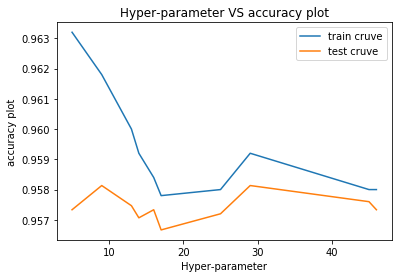

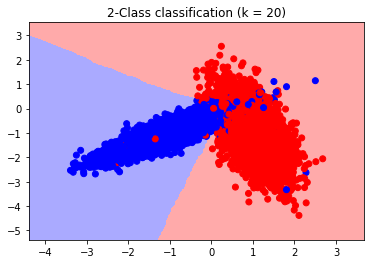

In [12]:
from sklearn.metrics import accuracy_score
#Fuction to find random values in the range
def rand(ranges,size):
    n=np.random.choice(ranges,size,replace=False)
    print(n.shape)
    return n

folds = 3
#RandomSearchCV to perform hyperparameter tuning
def RandomSearchCV(x_train,y_train,classifier, params_range, folds):
    train_scores = []
    test_scores  = [] 
    params = {'n_neighbors':params_range}
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = [] 
        for j in range(0, folds):
            index_length=len(x_train)/folds
            index_length=int(index_length)
            test_indices=list(set(list(range((index_length*j), (index_length*(j+1))))))
            #test_indices=list(x_train[j*index_length:(j+1)*index_length]) #unseen data to the model
            train_indices = list(set(list(range(0, len(x_train)))) - set(list(range(0,len(test_indices))))) #data to train the model
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))
            Y_predicted = classifier.predict(X_train)          
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted)) 
        train_scores.append(np.mean(np.array(trainscores_folds)))
        test_scores.append(np.mean(np.array(testscores_folds)))
    return train_scores,test_scores,params


from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

params_range=sorted(list(set(rand(50,10))))
print("Random Values = ", params_range)

train_scores,test_scores,params = RandomSearchCV(X_train, y_train, neigh, params_range, folds)
print("\n********** TRAIN ACCURACY SCORES **********\n")
print(train_scores)
print("\n********** TEST ACCURACY SCORES **********\n")
print(test_scores)
 

plt.plot(params['n_neighbors'],train_scores, label='train cruve')
plt.plot(params['n_neighbors'],test_scores, label='test cruve')
plt.xlabel('Hyper-parameter')
plt.ylabel('accuracy plot')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()
    
    
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 20)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)
